In [2]:
import numpy as np

# generate the data
np.random.seed(42)
N = 50
x = np.random.rand(N, 1)
y = np.sin(10 * x) + 0.1 * np.random.randn(N, 1)

# split the data manually
x_train, x_dev, y_train, y_dev = x[0:50:2], x[1:50:2], y[0:50:2], y[1:50:2]

Verwenden Sie dazu die Klasse SVR aus Scikit-Learn mit den Parametern kernel="rbf",
C=100 und epsilon=0.1. (Beachten Sie, dass der zusätzliche Parameter gamma in geeig-
neter Weise aus dem Wert von b errechnet werden muss.)

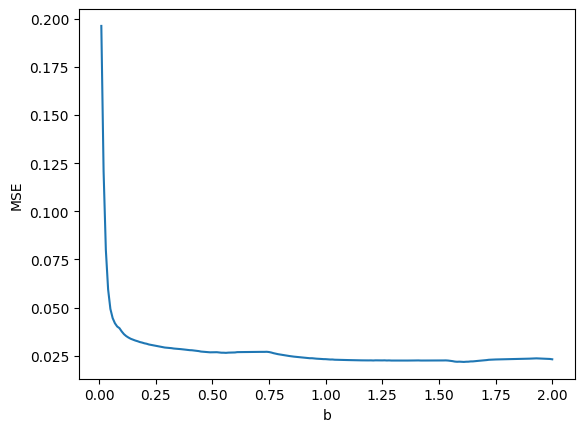

b:  1.61
MSE:  0.021790563501277234


In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define gamma as the inverse of b.
b = np.arange(0.01, 2.01, 0.01)
gamma = 1 / b

mse = []
for i in b:
    gamma = 1 / i
    model = make_pipeline(
        StandardScaler(), SVR(kernel="rbf", C=100, epsilon=0.1, gamma=gamma)
    )
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_dev)
    mse.append(mean_squared_error(y_dev, y_pred))

plt.plot(b, mse)
plt.xlabel("b")
plt.ylabel("MSE")
plt.show()

# Finden Sie den Wert für b, der den kleinsten Fehler liefert.
print("b: ", b[np.argmin(mse)])
print("MSE: ", np.min(mse))